In [24]:
%matplotlib notebook

import matplotlib.pyplot as plt
from imageio import imread
from matplotlib.animation import FuncAnimation

import numpy as np
import scipy.linalg as la

# Singular Value Decomposition

$$A = U \Sigma V^H$$

The SVD of a matrix $A$ is a factorization (equation above) where $U$ and $V$ have orthonormal columns and $\Sigma$ is diagonal. The diagonal entries of $\Sigma$ are singular values of $A$ and are the square roots of the eigenvalues of $A^H A$. $A^H A$ is always positive semi-definite (its eigenvalues are real and nonnegative). Usually, the singular values are sorted in decreasing order. Every $mxn$ matrix $A$ has an SVD with exactly $r$ nonzero singular values 

* Full SVD - Denoted as $A = U \Sigma V^H$. $U$ is $m \times n$, while $V$ is $n \times n$, and $\Sigma$ is $m \times n$. 



* Compact SVD - Denoted as $A = U_1 \Sigma_1 V_1^H$. $U_1$ is $m \times r$ (first $r$ columns of $U$), $V_1$ is $n \times r$ (the first columns of $V$), and $\Sigma_1$ is $r \times r$ (the first $r \times r$ block of $\Sigma$). The zero singular values and the corresponding columns of $U$ and $V$ are neglected.

In [2]:
def compact_SVD(A):
    m,n = A.shape
    
    lambd, V = la.eig(np.matrix(A).H @ A)
    
    singular_vals = np.sqrt(lambd)
    
    # Sorting
    sorting_indices = np.argsort(singular_vals)[::-1]

    singular_vals = singular_vals[sorting_indices]
    sorted_V = np.array([V[:,sorting_indices[i]] for i in range(0, n)]).T
    
    # Calculating the rank
    r = np.sum([i!=0 for i in lambd]) # rank
    
    # Truncated part
    singular_vals_1 = singular_vals[:r]
    V_1 = sorted_V[:,:r]
    
    # Computing for U_1
    U_1 = A @ V_1 / singular_vals_1
    
    return U_1, singular_vals_1, np.matrix(V_1).H

In [3]:
A = np.random.random((5,3))

U_1, singular_vals_1, V_1_H = compact_SVD(A)

In [4]:
# Sanity check

U_1 @ np.diag(singular_vals_1) @ V_1_H

matrix([[0.91599596+0.j, 0.03485527+0.j, 0.89866313+0.j],
        [0.41521796+0.j, 0.30898177+0.j, 0.96241619+0.j],
        [0.20997424+0.j, 0.12553985+0.j, 0.69990411+0.j],
        [0.71061625+0.j, 0.43008203+0.j, 0.88846648+0.j],
        [0.89150961+0.j, 0.99053873+0.j, 0.83571324+0.j]])

In [5]:
A

array([[0.91599596, 0.03485527, 0.89866313],
       [0.41521796, 0.30898177, 0.96241619],
       [0.20997424, 0.12553985, 0.69990411],
       [0.71061625, 0.43008203, 0.88846648],
       [0.89150961, 0.99053873, 0.83571324]])

# Problem 2

In [6]:
theta = np.linspace(0, 2 * np.pi, 200)

x = np.cos(theta)
y = np.sin(theta)
    
S = np.vstack((x, y))
E = np.array([[1,0,0],
              [0,0,1]])

<IPython.core.display.Javascript object>


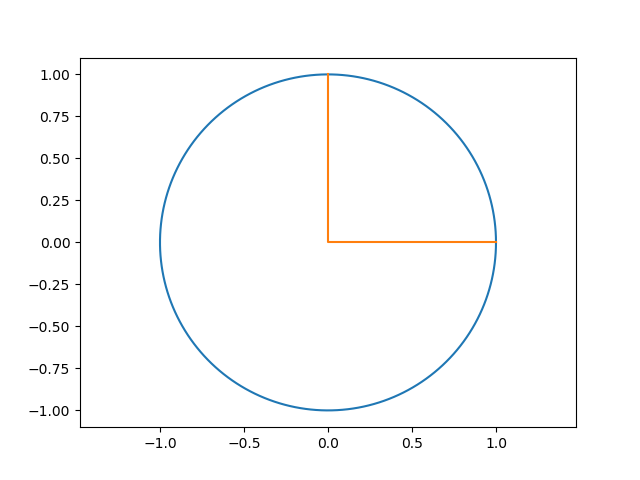

(-1.09986915899354, 1.0999937694758828, -1.099967289238864, 1.0999984423447078)

In [7]:
plt.figure()
plt.plot(S[0],S[1])
plt.plot(E[0], E[1])
plt.axis('equal')

In [8]:
A = np.array([[3,1], [1,3]])
U, sigm, V_H = la.svd(A)

<IPython.core.display.Javascript object>


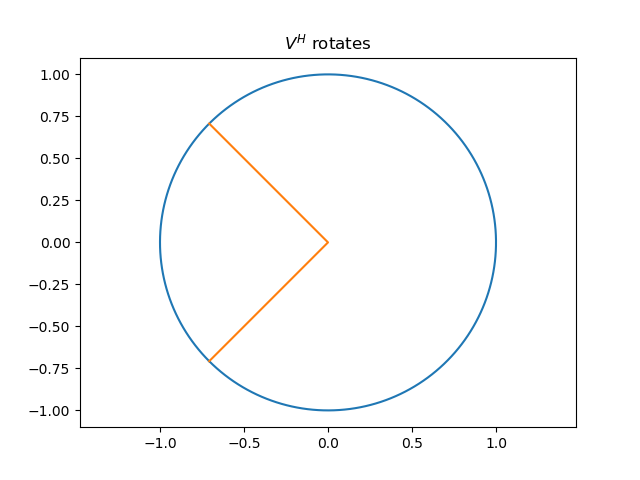

Text(0.5, 1.0, '$V^H$ rotates')

In [9]:
plt.figure()

VH_S = V_H @ S
VH_E = V_H @ E

plt.plot(VH_S[0], VH_S[1])
plt.plot(VH_E[0], VH_E[1])
plt.axis('equal')
plt.title(r"$V^H$ rotates")

<IPython.core.display.Javascript object>


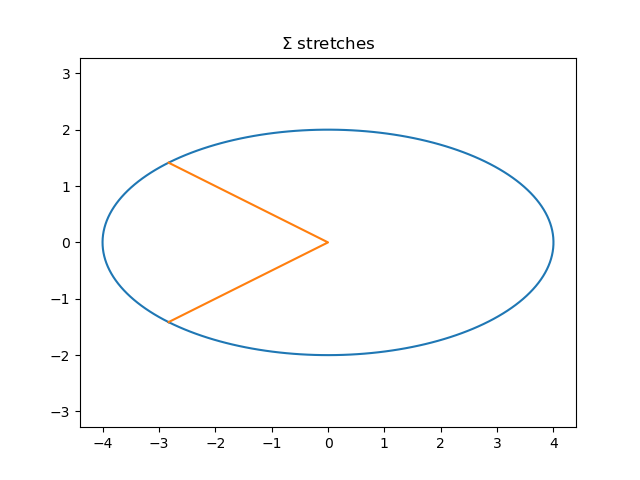

Text(0.5, 1.0, '$\\Sigma$ stretches')

In [10]:
plt.figure()

sigma_VH_S = np.diag(sigm) @ V_H @ S
sigma_VH_E = np.diag(sigm) @ V_H @ E

plt.plot(sigma_VH_S[0], sigma_VH_S[1])
plt.plot(sigma_VH_E[0], sigma_VH_E[1])
plt.axis('equal')
plt.title(r"$\Sigma$ stretches")

<IPython.core.display.Javascript object>


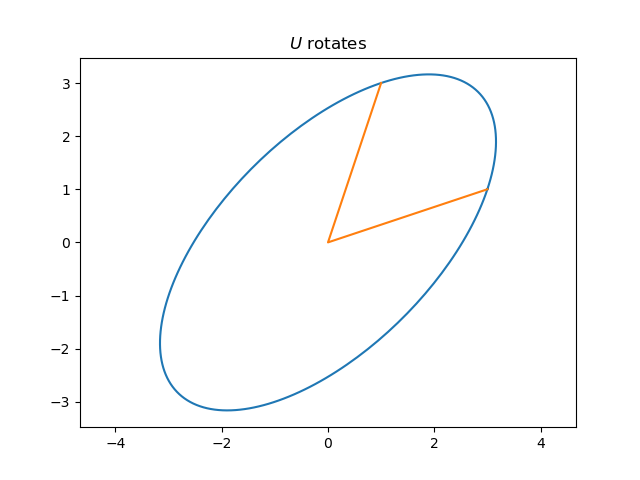

Text(0.5, 1.0, '$U$ rotates')

In [11]:
plt.figure()

U_sigma_VH_S = U @ np.diag(sigm) @ V_H @ S
U_sigma_VH_E = U @ np.diag(sigm) @ V_H @ E

plt.plot(U_sigma_VH_S[0], U_sigma_VH_S[1])
plt.plot(U_sigma_VH_E[0], U_sigma_VH_E[1])
plt.axis('equal')
plt.title(r"$U$ rotates")

# Truncated SVD

We get the compact SVD first then we do array slicing.

$$ A_s = \sum_{i=1}^{s} \sigma_i \textbf{u}_i \textbf{v}_i^H$$

$s<r$, where $r$ is the rank of the matrix and $s$ is an user-defined number. The dimensions of the factors are: $\hat{U}$ is $m \times s$, $\hat{\Sigma}$ is $s\times s$ , and $\hat{V}$ is $n \times s$

In [12]:
def truncated_SVD(A, s):
    m, n = A.shape
    
    # Get the compact SVD
    U_1, singular_vals_1, V_1_H = compact_SVD(A)
    
    # If s is greater than r
    if s > len(singular_vals_1):
        raise ValueError('s must not be greater than {}'.format(len(singular_vals_1))) 
        
    # Slicing
    U = U_1[:,:s] # m x s
    Sigma = singular_vals_1[:s] # s x s
    V = V_1_H[:s,:n] # n x s
    
    # Getting A_s
    A_s = np.array(U @ np.diag(Sigma) @ V)
    size = U.size + Sigma.size + V.size
    
    return A_s.real, size

In [13]:
A = np.random.random((5,3))

A_s2, size  = truncated_SVD(A, 1)
la.norm(A_s2)

1.686576508025456

In [14]:
A_s3, size  = truncated_SVD(A, 2)
la.norm(A_s3)

1.7733572659008863

In [15]:
la.norm(A)

1.8063144525905337

# Low-rank approximation

$$||A - A_s|| = \sigma_{s+1} $$
$$||A - A_s|| < \epsilon$$

Remember that $s < r$

In [16]:
def low_rank_SVD(A, epsilon):
    A = np.random.random((5,5))
    m,n = A.shape

    # Full SVD
    U, sigm, V_H = la.svd(A)
    r = len(sigm) # rank of A
    
    # Get the compact SVD
    U_1, singular_vals_1, V_1_H = compact_SVD(A)
    
    # Compute ||A - A_s||
    s_list = [i for i in range(1, r)] # List containing s values, s<r
    A_s_list = np.array([U_1[:,:s] @ np.diag(singular_vals_1[:s]) @ V_1_H[:s,:n] for s in s_list]) # List containing A - A_s
    error = np.array([la.norm(A - i) for i in A_s_list]) # Compute the error

    s = np.where(error < epsilon)[0] # best s
    
    # In case there is no best low-rank approximation
    if len(s)==0:
        raise ValueError('A cannot be approximated within the tolerance by a matrix of lesser rank.') 
        
    A_s = U_1[:,:s[0]] @ np.diag(singular_vals_1[:s[0]]) @ V_1_H[:s[0],:n]
    size = U_1[:,:s[0]].size + singular_vals_1[:s[0]].size + V_1_H[:s[0],:n].size
    return np.array(A_s).real, size

In [17]:
A = np.random.random((5,5))

A_s, size = low_rank_SVD(A, 0.4)

In [18]:
A_s

array([[0.26640091, 0.58997476, 0.35917306, 0.13213558, 0.30893466],
       [0.29550124, 0.89506622, 0.44746956, 0.04348197, 0.39746015],
       [0.5831007 , 0.84742449, 0.69565643, 0.47938447, 0.57514844],
       [0.41393019, 0.05888671, 0.38319055, 0.57277745, 0.28475267],
       [0.08033848, 0.10227638, 0.09289402, 0.07225164, 0.07594667]])

# Image Compression

We use the low-rank approximate SVD to reduce the size of the image

Instructions:
    * Get matrix using imread
    * compute best rank-s approximation from problem 3

In [19]:
def plot(image_name, s):
    image = imread(image_name) / 255

    # Computes the low-rank approx image
    ##If colored
    if image.shape[-1]==3:
        R = image[:,:,0]
        G = image[:,:,1]
        B = image[:,:,2]
        
        R_s, R_size = truncated_SVD(R, s)
        G_s, G_size = truncated_SVD(G, s)
        B_s, B_size = truncated_SVD(B, s)

        image_s = np.dstack((R_s, G_s, B_s))
        size = R_size + G_size + B_size
        
        
    ## Grayscale 
    else:
        image_s, size = truncated_SVD(image, s)
        
        
    # Plots the original and compressed image     
    plt.figure()
    # Original Image
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    

    # Plots the low-rank approx
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title('Rank {}'.format(s))
    plt.imshow(image_s.real, cmap='gray')

    plt.suptitle("Difference of {} entries".format(image.size - size))

<IPython.core.display.Javascript object>


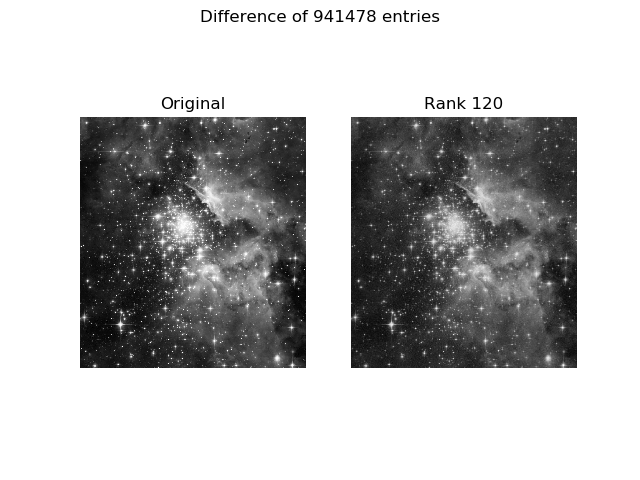

In [20]:
plot("hubble_gray.jpg", 120)

<IPython.core.display.Javascript object>


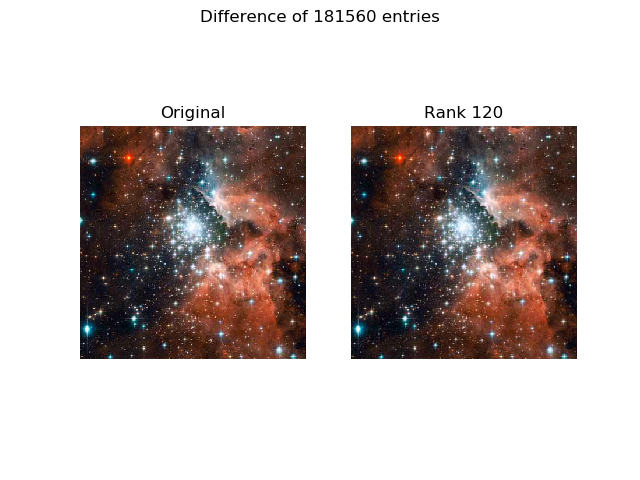

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [23]:
plot("hubble_image.jpg", 120)

# Animation

In [64]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


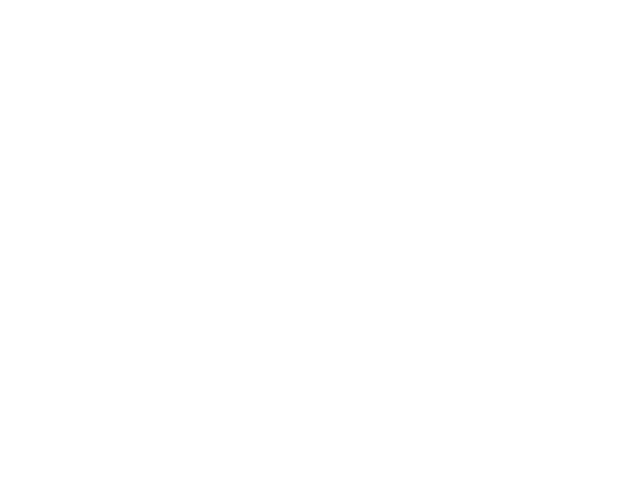

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [86]:
fig = plt.figure()

image = imread("hubble_image.jpg") / 255
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

s_list = [2, 20,60, 120, 200]
ims = []
for s in s_list:
    R_s, R_size = truncated_SVD(R, s)
    G_s, G_size = truncated_SVD(G, s)
    B_s, B_size = truncated_SVD(B, s)
    
    im = plt.imshow(np.dstack((R_s.real, G_s.real, B_s.real)), animated=True)
    ims.append([im])
    plt.axis('off')
    
ani = animation.ArtistAnimation(fig, ims, interval=2000, blit=True,
                                repeat_delay=5000)